In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 120)
%matplotlib inline

In [134]:
# Load datasets
microsoft_los = pd.read_csv("raw-data/LengthOfStay.csv")
investments_los = pd.read_csv("raw-data/Healthcare_Investments_and_Hospital_Stay (1).csv")

# Display first few rows of each dataset
print("Microsoft Length of Stay Data:")
print(microsoft_los.head())
print("\nInvestments Length of Stay Data:")
print(investments_los.head())

Microsoft Length of Stay Data:
   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  pneum  substancedependence  \
0    1   8/29/2012      0      F                      0       0        0      0                    0   
1    2   5/26/2012     5+      F                      0       0        0      0                    0   
2    3   9/22/2012      1      F                      0       0        0      0                    0   
3    4    8/9/2012      0      F                      0       0        0      0                    0   
4    5  12/20/2012      0      F                      0       0        0      1                    0   

   psychologicaldisordermajor  depress  psychother  fibrosisandother  malnutrition  hemo  hematocrit  neutrophils  \
0                           0        0           0                 0             0     0        11.5        14.20   
1                           0        0           0                 0             0     0         9.0         4

In [135]:
# Inspect Microsoft dataset

microsoft_los.info()
microsoft_los.describe(include="all").T.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
eid,100000.0,NaN,NaN,NaN,50000.5,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
vdate,100000,367,10/3/2012,333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rcount,100000,6,0,55031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,100000,2,F,57643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dialysisrenalendstage,100000.0,NaN,NaN,NaN,0.03642,0.187334,0.0,0.0,0.0,0.0,1.0
asthma,100000.0,NaN,NaN,NaN,0.03527,0.184462,0.0,0.0,0.0,0.0,1.0
irondef,100000.0,NaN,NaN,NaN,0.09494,0.293134,0.0,0.0,0.0,0.0,1.0
pneum,100000.0,NaN,NaN,NaN,0.03945,0.194664,0.0,0.0,0.0,0.0,1.0
substancedependence,100000.0,NaN,NaN,NaN,0.06306,0.243072,0.0,0.0,0.0,0.0,1.0
psychologicaldisordermajor,100000.0,NaN,NaN,NaN,0.23904,0.426499,0.0,0.0,0.0,0.0,1.0


In [136]:
# Data types and length of stay sanity check

ms = microsoft_los.copy()

# Parse dates
ms["vdate"] = pd.to_datetime(ms["vdate"])
ms["discharged"] = pd.to_datetime(ms["discharged"])

# Normalize rcount and convert to int
ms["rcount"] = ms["rcount"].replace({"5+": 5}).astype(int)

# Categorical columns
ms["gender"] = ms["gender"].astype("category")
ms["facid"] = ms["facid"].astype("category")

# Verify length of stay calculation
ms["los_from_dates"] = (ms["discharged"] - ms["vdate"]).dt.days

# Agreement check
agreement_rate = (ms["los_from_dates"] == ms["lengthofstay"]).mean()
agreement_rate

np.float64(1.0)

In [137]:
# Start cleaning and feature engineering for Microsoft dataset

ms2 = ms.copy()

# Organize columns by role
flag_cols = [
    "dialysisrenalendstage","asthma","irondef","pneum","substancedependence",
    "psychologicaldisordermajor","depress","psychother","fibrosisandother",
    "malnutrition","hemo","secondarydiagnosisnonicd9"
]
lab_vitals_cols = [
    "hematocrit","neutrophils","sodium","glucose","bloodureanitro",
    "creatinine","bmi","pulse","respiration"
]

# Ensure flag cols are compact integer dtype
ms2[flag_cols] = ms2[flag_cols].astype("Int8")


# Glucose cleaning (handle negative value, impute median for facility)
ms2.loc[ms2["glucose"] < 0, "glucose"] = np.nan
ms2.isna().sum()

# Per-facility median for glucose
fac_glu_med = ms2.groupby("facid", observed=False)["glucose"].transform("median")

# Fill NaNs with facility median
ms2["glucose"] = ms2["glucose"].fillna(fac_glu_med)

print(ms2['glucose'].isna().sum())  # Should be 0 now


# Break down time features
ms2["visit_dow"] = ms2["vdate"].dt.dayofweek       # 0=Mon … 6=Sun
ms2["visit_month"] = ms2["vdate"].dt.month
ms2["visit_year"] = ms2["vdate"].dt.year
ms2["is_weekend"] = (ms2["visit_dow"] >= 5).astype("Int8")

# Encode gender, keep one column
ms2["gender_M"] = (ms2["gender"] == "M").astype("Int8")

# Encode facility ID
ms2["facid"] = ms2["facid"].astype("category")

# Assemble feature frame (exclude IDs, raw dates, and target)
drop_cols = ["eid","vdate","discharged","lengthofstay","los_from_dates","gender"]
feature_cols = [col for col in ms2.columns if col not in drop_cols]
ms_feat = ms2[feature_cols].copy()

0


In [138]:
# Basic QA checks
msq = ms2.copy()

# Trim stray whitespace in facility ids
msq["facid"] = msq["facid"].astype(str).str.strip().astype("category")

# Handle duplicates in eid (each eid should be unique)
dup_eid = msq.duplicated(subset=["eid"]).sum()
print(f"Number of duplicates in EID: {dup_eid}")

# Check for negative and impossible values
num_cols = [
    "hematocrit","neutrophils","sodium","glucose","bloodureanitro",
    "creatinine","bmi","pulse","respiration","rcount"
]
neg_any = (msq[num_cols] < 0).any(axis=1)
zero_impossible = (msq[["bmi","pulse","respiration"]] <= 0).any(axis=1)

impossible_count = (neg_any | zero_impossible).sum()
print(f"Number of records with impossible values: {impossible_count}")

# Check for extremely high outliers
q999 = msq[num_cols].quantile(0.999)
ext_mask = pd.concat([msq[c] > q999[c] for c in num_cols], axis=1).any(axis=1)
print("Rows beyond 99.9th percentile:", int(ext_mask.sum()))
msq.loc[neg_any | zero_impossible | ext_mask, ["eid","facid"] + num_cols].head(10)


Number of duplicates in EID: 0
Number of records with impossible values: 0
Rows beyond 99.9th percentile: 877


,eid,facid,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,rcount
264,265,B,12.0,10.4,137.677595,165.948927,11.0,0.838357,31.955376,71,9.2,3
266,267,B,11.9,9.4,148.876113,109.550329,12.0,1.417710,30.078985,85,6.5,0
670,671,B,18.2,42.0,141.328093,111.132187,12.0,1.141570,28.590883,76,6.5,0
788,789,E,9.3,62.6,138.669079,140.432284,20.0,1.198164,31.129977,67,7.0,0
1178,1179,B,11.8,7.5,140.643124,186.120395,252.5,1.221414,27.968516,89,6.8,3
1240,1241,E,11.2,71.5,139.334283,138.437846,24.0,1.110207,32.145819,62,6.6,1
1244,1245,B,19.0,13.2,148.878278,135.402097,12.0,1.205512,29.349691,65,6.5,4
1253,1254,C,14.1,6.3,134.428486,143.946355,20.0,1.796256,29.533381,80,6.5,0
2148,2149,E,13.5,48.9,137.602939,188.764464,12.0,1.053033,31.496820,94,6.5,3
2393,2394,A,21.2,10.6,138.757221,124.387165,12.0,1.268627,30.666952,71,6.5,2


In [139]:
msw = msq.copy()

# Numeric columns to clean
num_cols = [
    "hematocrit","neutrophils","sodium","glucose","bloodureanitro",
    "creatinine","bmi","pulse","respiration"
]

# Negative values in any lab/vital to NaN
neg_mask = msw[num_cols] < 0
msw[num_cols] = msw[num_cols].mask(neg_mask)

# Negative BMI/Pulse/Respiration to NaN
nonpos_cols = ["bmi","pulse","respiration"]
nonpos_mask = msw[nonpos_cols] <= 0
msw[nonpos_cols] = msw[nonpos_cols].mask(nonpos_mask)

# Winsorize extreme outliers
for c in num_cols:
    lo, hi = msw[c].quantile([0.005, 0.995])
    msw[c] = msw[c].clip(lower=lo, upper=hi)

# Impute NaNs with facility median and global median fallback
for c in num_cols:
    fac_med = msw.groupby("facid", observed=False)[c].transform("median")
    msw[c] = msw[c].fillna(fac_med).fillna(msw[c].median())
    print(f"{c}: {msw[c].isna().sum()} missing after imputation")

hematocrit: 0 missing after imputation
neutrophils: 0 missing after imputation
sodium: 0 missing after imputation
glucose: 0 missing after imputation
bloodureanitro: 0 missing after imputation
creatinine: 0 missing after imputation
bmi: 0 missing after imputation
pulse: 0 missing after imputation
respiration: 0 missing after imputation


In [140]:
# EDA for investments dataset
investments_los.info()
investments_los.head(10)
investments_los.describe(include="all").T.head(20)
investments_los.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64

In [141]:
# Some basic data checking for investments dataset

inv = investments_los.copy()

# Trim whitespace in Location column
inv['Location'] = inv['Location'].str.strip()

# Check duplicates in Location and Time
dup_ct = inv.duplicated(subset=['Location', 'Time']).sum()
print(dup_ct)

# Simple range check
year_min, year_max = inv['Time'].min(), inv['Time'].max()

# Flag impossible columns
num_cols = ["Hospital_Stay", "MRI_Units", "CT_Scanners", "Hospital_Beds"]
neg_mask = (inv[num_cols] < 0).any(axis=1)
zero_mask = (inv[["MRI_Units", "CT_Scanners", "Hospital_Beds"]] == 0).any(axis=1)

print("Unique locations:", inv["Location"].nunique())
print("Year range:", year_min, "to", year_max)
print("Duplicate (Location, Time) rows:", dup_ct)
print("Rows with any negative values:", int(neg_mask.sum()))
print("Rows with 0 MRI/CT/Beds:", int(zero_mask.sum()))
inv.loc[neg_mask | zero_mask].head(10)
print()

0
Unique locations: 32
Year range: 1990 to 2018
Duplicate (Location, Time) rows: 0
Rows with any negative values: 0
Rows with 0 MRI/CT/Beds: 0



In [142]:
# Create features to balance large and small hospitals for comparisons
inv2 = inv.copy()

inv2["ct_per_100_beds"]  = inv2["CT_Scanners"] / inv2["Hospital_Beds"] * 100
inv2["mri_per_100_beds"] = inv2["MRI_Units"]   / inv2["Hospital_Beds"] * 100
inv2["ct_to_mri_ratio"]  = inv2["CT_Scanners"] / inv2["MRI_Units"]

inv2.head(3)

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds,ct_per_100_beds,mri_per_100_beds,ct_to_mri_ratio
0,AUS,1992,6.6,1.43,16.71,1.43,1168.531469,100.0,11.685315
1,AUS,1994,6.4,2.36,18.48,2.36,783.050847,100.0,7.830508
2,AUS,1995,6.5,2.89,20.55,2.89,711.072664,100.0,7.110727


In [143]:
# Fix magnitude for engineered features, assuming per million for CT/MRI and per thousand for beds
inv3 = inv2.copy()

beds_per_1000 = inv3["Hospital_Beds"]
ct_per_million = inv3["CT_Scanners"]
mri_per_million = inv3["MRI_Units"]

inv3["ct_per_100_beds"]  = ct_per_million / (10 * beds_per_1000)
inv3["mri_per_100_beds"] = mri_per_million / (10 * beds_per_1000)
inv3["ct_to_mri_ratio"]  = ct_per_million / mri_per_million

# Quick sanity check on magnitudes
inv3[["Location","Time","Hospital_Stay","Hospital_Beds","CT_Scanners","MRI_Units",
      "ct_per_100_beds","mri_per_100_beds","ct_to_mri_ratio"]].head(5)


,Location,Time,Hospital_Stay,Hospital_Beds,CT_Scanners,MRI_Units,ct_per_100_beds,mri_per_100_beds,ct_to_mri_ratio
0,AUS,1992,6.6,1.43,16.71,1.43,1.168531,0.1,11.685315
1,AUS,1994,6.4,2.36,18.48,2.36,0.783051,0.1,7.830508
2,AUS,1995,6.5,2.89,20.55,2.89,0.711073,0.1,7.110727
3,AUS,1996,6.4,2.96,21.95,2.96,0.741554,0.1,7.415541
4,AUS,1997,6.2,3.53,23.34,3.53,0.661190,0.1,6.611898


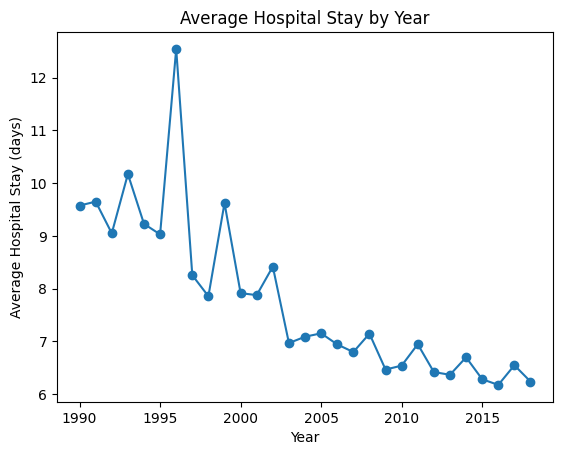

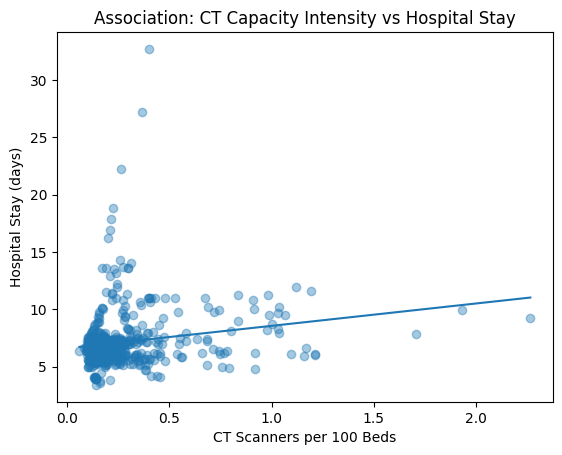

In [144]:
# Quick line plot of yearly averages of hospital stay
yearly = inv2.groupby("Time", as_index=False)["Hospital_Stay"].mean()

plt.figure()
plt.plot(yearly["Time"], yearly["Hospital_Stay"], marker='o')
plt.xlabel("Year")
plt.ylabel("Average Hospital Stay (days)")
plt.title("Average Hospital Stay by Year")
plt.show()

# Scatter of CT per 100 beds vs Hospital Stay
x = inv3["ct_per_100_beds"]
y = inv3["Hospital_Stay"]

plt.figure()
plt.scatter(x, y, alpha=0.4)

# Linear fit line
coef = np.polyfit(x.dropna(), y[x.notna()], 1)
xline = np.linspace(x.min(), x.max(), 200)
yline = coef[0] * xline + coef[1]
plt.plot(xline, yline)

plt.xlabel("CT Scanners per 100 Beds")
plt.ylabel("Hospital Stay (days)")
plt.title("Association: CT Capacity Intensity vs Hospital Stay")
plt.show()

In [145]:
# Quick data consistency check between MRI_Units and Hospital_Beds in raw file. These columns should not be identical.

# Fresh read from disk
inv_raw = pd.read_csv(r"C:\Users\Sheesh\Documents\projects\LoS-analysis\raw-data\Healthcare_Investments_and_Hospital_Stay (1).csv")

# Quick peek of originals
print(inv_raw.head(10)[["Location","Time","Hospital_Stay","CT_Scanners","MRI_Units","Hospital_Beds"]])

# Are MRI_Units and Hospital_Beds identical in the raw file?
raw_equal = (inv_raw["MRI_Units"] == inv_raw["Hospital_Beds"]).all()
raw_diff_examples = inv_raw.loc[inv_raw["MRI_Units"] != inv_raw["Hospital_Beds"], ["Location","Time","MRI_Units","Hospital_Beds"]].head(5)

print(raw_equal, raw_diff_examples)



  Location  Time  Hospital_Stay  CT_Scanners  MRI_Units  Hospital_Beds
0      AUS  1992            6.6        16.71       1.43           1.43
1      AUS  1994            6.4        18.48       2.36           2.36
2      AUS  1995            6.5        20.55       2.89           2.89
3      AUS  1996            6.4        21.95       2.96           2.96
4      AUS  1997            6.2        23.34       3.53           3.53
5      AUS  1998            6.1        24.18       4.51           4.51
6      AUS  1999            6.2        25.52       6.01           6.01
7      AUS  2000            6.1        26.28       3.52           3.52
8      AUS  2001            6.2        29.05       3.79           3.79
9      AUS  2002            6.2        34.37       3.74           3.74
True Empty DataFrame
Columns: [Location, Time, MRI_Units, Hospital_Beds]
Index: []


In [146]:
# Start from a clean read of the raw investments file
inv6 = inv_raw.copy()

# Drop duplicate column; rename for clarity
inv6 = inv6.drop(columns=["Hospital_Beds"]).rename(
    columns={"CT_Scanners": "CT_per_million", "MRI_Units": "MRI_per_million"}
)

# Add CT:MR ratio (raw, per-capita units)
inv6["CT_to_MRI_ratio"] = inv6["CT_per_million"] / inv6["MRI_per_million"]

inv6.head(5)


,Location,Time,Hospital_Stay,MRI_per_million,CT_per_million,CT_to_MRI_ratio
0,AUS,1992,6.6,1.43,16.71,11.685315
1,AUS,1994,6.4,2.36,18.48,7.830508
2,AUS,1995,6.5,2.89,20.55,7.110727
3,AUS,1996,6.4,2.96,21.95,7.415541
4,AUS,1997,6.2,3.53,23.34,6.611898


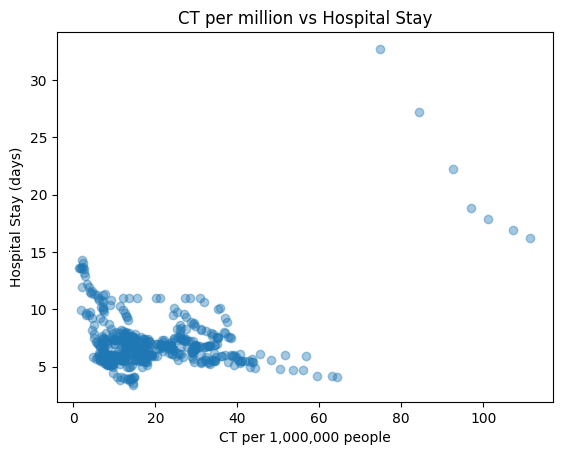

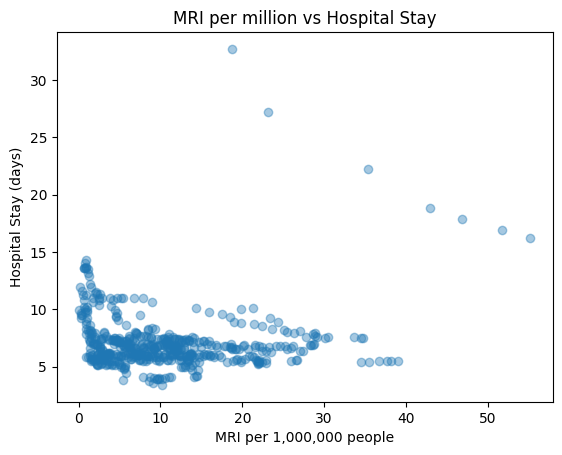

In [147]:
# CT per million vs Hospital_Stay
plt.figure()
plt.scatter(inv6["CT_per_million"], inv6["Hospital_Stay"], alpha=0.4)
plt.xlabel("CT per 1,000,000 people")
plt.ylabel("Hospital Stay (days)")
plt.title("CT per million vs Hospital Stay")
plt.show()

# MRI per million vs Hospital_Stay
plt.figure()
plt.scatter(inv6["MRI_per_million"], inv6["Hospital_Stay"], alpha=0.4)
plt.xlabel("MRI per 1,000,000 people")
plt.ylabel("Hospital Stay (days)")
plt.title("MRI per million vs Hospital Stay")
plt.show()

In [ ]:
# Pearson correlations

inv = inv6.copy()

features = ["CT_per_million", "MRI_per_million", "CT_to_MRI_ratio"]

for f in features:
    r = inv["Hospital_Stay"].corr(inv[f])
    print(f"{f}: Pearson r = {r:.4f}")

CT_per_million: Pearson r = 0.2493
MRI_per_million: Pearson r = 0.0589
CT_to_MRI_ratio: Pearson r = 0.1881
